In [1]:
import pandas as pd

df = pd.read_csv('input/google_data.csv')
df['file_name']=df['id']+'.jpg'
df=df[['file_name','dx','id']]
df.head()

from sklearn.model_selection import train_test_split
label_dataframe=df.pop('dx').to_frame()
X_train, X_test, y_train, y_test = train_test_split(df, label_dataframe, test_size=0.1, random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_val.shape)
print(X_train.shape)
print(X_test.shape)

(426, 2)
(1703, 2)
(237, 2)


In [2]:
train=pd.concat([X_train,y_train],axis=1)
val=pd.concat([X_val,y_val],axis=1)
test=pd.concat([X_test,y_test],axis=1)


In [3]:
from sklearn import preprocessing
vle = preprocessing.LabelEncoder()
vle.fit(val['dx'])
label=vle.transform(val['dx']) 
print(list(vle.classes_))
val['label']=label
print(train.head())
le_name_mapping = dict(zip(vle.classes_, vle.transform(vle.classes_)))
print(le_name_mapping)

trle = preprocessing.LabelEncoder()
trle.fit(train['dx'])
label=trle.transform(train['dx']) 
print(list(trle.classes_))
train['label']=label
print(train.head())
le_name_mapping = dict(zip(trle.classes_, trle.transform(trle.classes_)))
print(le_name_mapping)

le = preprocessing.LabelEncoder()
le.fit(test['dx'])
label=le.transform(test['dx']) 
print(list(le.classes_))
test['label']=label
print(test.head())
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

['acnea', 'bacterial_infection', 'dermatitis', 'fungal_infection', 'hyperpigmentation', 'hypertrophy', 'moles', 'papule', 'pemphigus_vulgaris', 'scabies', 'virus']
                      file_name                     id           dx
1761   hypertrophy (75).jpg.jpg   hypertrophy (75).jpg  hypertrophy
1005        moles (183).jpg.jpg        moles (183).jpg        moles
1834  hypertrophy (148).jpg.jpg  hypertrophy (148).jpg  hypertrophy
1986        papule (92).jpg.jpg        papule (92).jpg       papule
2277   dermatitis (111).jpg.jpg   dermatitis (111).jpg   dermatitis
{'acnea': 0, 'bacterial_infection': 1, 'dermatitis': 2, 'fungal_infection': 3, 'hyperpigmentation': 4, 'hypertrophy': 5, 'moles': 6, 'papule': 7, 'pemphigus_vulgaris': 8, 'scabies': 9, 'virus': 10}
['acnea', 'bacterial_infection', 'dermatitis', 'fungal_infection', 'hyperpigmentation', 'hypertrophy', 'moles', 'papule', 'pemphigus_vulgaris', 'scabies', 'virus']
                      file_name                     id           d

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
rescale = 1./255,
featurewise_center=False,  # set input mean to 0 over the dataset
samplewise_center=False,  # set each sample mean to 0
featurewise_std_normalization=False,  # divide inputs by std of the dataset
samplewise_std_normalization=False,  # divide each input by its std
zca_whitening=False,  # apply ZCA whitening
rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
zoom_range = 0.4, # Randomly zoom image 
shear_range=0.2,
width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
horizontal_flip=True,  # randomly flip images
vertical_flip=True)  # randomly flip images)


Using TensorFlow backend.


In [5]:
train_data= train_generator.flow_from_dataframe(
dataframe=train,
x_col="id",
y_col="dx",
batch_size=4,
seed=311,
directory="input/google_images",
shuffle=True,
class_mode="categorical",
target_size=(224,224))

Found 1703 validated image filenames belonging to 11 classes.


In [6]:
test_generator=ImageDataGenerator(
rescale = 1./255)
test_data= test_generator.flow_from_dataframe(
dataframe=test,
x_col="id",
y_col="dx",
seed=311,
directory="input/google_images",
shuffle=False,
batch_size=1,
class_mode=None,
target_size=(224,224))

Found 237 validated image filenames.


In [7]:
val_data=test_generator.flow_from_dataframe(
dataframe=val,
directory="input/google_images",
x_col="id",
y_col="dx",
batch_size=1,
seed=311,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

Found 426 validated image filenames belonging to 11 classes.


In [8]:
print(train['dx'].value_counts())
print(val['dx'].value_counts())
print(test['dx'].value_counts())

moles                  207
virus                  206
papule                 186
acnea                  186
hyperpigmentation      169
hypertrophy            154
dermatitis             150
bacterial_infection    130
pemphigus_vulgaris     118
fungal_infection       114
scabies                 83
Name: dx, dtype: int64
virus                  64
moles                  55
papule                 53
acnea                  40
dermatitis             36
hyperpigmentation      35
bacterial_infection    35
pemphigus_vulgaris     31
hypertrophy            30
fungal_infection       29
scabies                18
Name: dx, dtype: int64
papule                 33
virus                  27
hyperpigmentation      27
hypertrophy            24
bacterial_infection    22
acnea                  22
moles                  20
pemphigus_vulgaris     20
scabies                15
fungal_infection       14
dermatitis             13
Name: dx, dtype: int64


In [9]:
from sklearn.utils import class_weight
import numpy as np

class_weight = np.round(class_weight.compute_class_weight('balanced',np.unique(y_train),y_train['dx']))
print(class_weight)
print(train_data.class_indices)
print(val_data.class_indices)
print(train['dx'].value_counts())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.]
{'acnea': 0, 'bacterial_infection': 1, 'dermatitis': 2, 'fungal_infection': 3, 'hyperpigmentation': 4, 'hypertrophy': 5, 'moles': 6, 'papule': 7, 'pemphigus_vulgaris': 8, 'scabies': 9, 'virus': 10}
{'acnea': 0, 'bacterial_infection': 1, 'dermatitis': 2, 'fungal_infection': 3, 'hyperpigmentation': 4, 'hypertrophy': 5, 'moles': 6, 'papule': 7, 'pemphigus_vulgaris': 8, 'scabies': 9, 'virus': 10}
moles                  207
virus                  206
papule                 186
acnea                  186
hyperpigmentation      169
hypertrophy            154
dermatitis             150
bacterial_infection    130
pemphigus_vulgaris     118
fungal_infection       114
scabies                 83
Name: dx, dtype: int64


In [10]:
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                    patience=8, 
                                    verbose=1, 
                                    factor=0.2, 
                                    min_lr=0.0001)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11))
model.add(Activation('softmax'))

model.compile(loss='kullback_leibler_divergence',
              optimizer='rmsprop',
              metrics=['top_k_categorical_accuracy', 'categorical_accuracy'])

In [21]:
history=model.fit_generator(generator=train_data,
                            steps_per_epoch=train_data.samples//train_data.batch_size,
                            validation_data=val_data,
                            verbose=1,
                            validation_steps=val_data.samples//val_data.batch_size,
                            epochs=10,
                            class_weight=class_weight,
                            callbacks=[learning_rate_reduction])

Epoch 1/10
425/425 [==============================] - 50s 117ms/step - loss: 2.4518 - top_k_categorical_accuracy: 0.5197 - categorical_accuracy: 0.1218 - val_loss: 2.1852 - val_top_k_categorical_accuracy: 0.5235 - val_categorical_accuracy: 0.1268
Epoch 2/10
425/425 [==============================] - 18s 43ms/step - loss: 2.3992 - top_k_categorical_accuracy: 0.5509 - categorical_accuracy: 0.1177 - val_loss: 2.7210 - val_top_k_categorical_accuracy: 0.4859 - val_categorical_accuracy: 0.0822
Epoch 3/10
425/425 [==============================] - 19s 44ms/step - loss: 2.4010 - top_k_categorical_accuracy: 0.5544 - categorical_accuracy: 0.1236 - val_loss: 2.2431 - val_top_k_categorical_accuracy: 0.6244 - val_categorical_accuracy: 0.1667
Epoch 4/10
425/425 [==============================] - 18s 43ms/step - loss: 2.3962 - top_k_categorical_accuracy: 0.5898 - categorical_accuracy: 0.1442 - val_loss: 2.4029 - val_top_k_categorical_accuracy: 0.6408 - val_categorical_accuracy: 0.1549
Epoch 5/10
425/

In [22]:
model.save('google.h5')

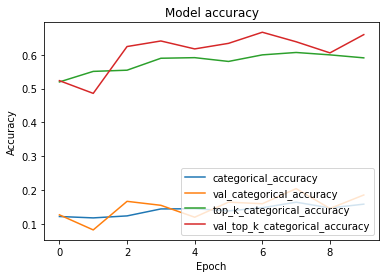

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['categorical_accuracy', 'val_categorical_accuracy', 'top_k_categorical_accuracy', 'val_top_k_categorical_accuracy'], loc='lower right')
plt.show()

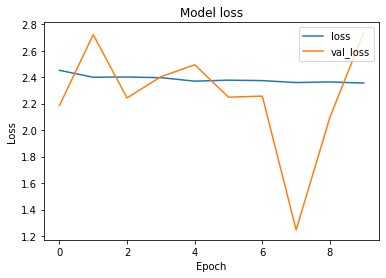

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [25]:
val_data.reset()
predictions = model.predict_generator(val_data, steps=val_data.samples/val_data.batch_size,verbose=1)
y_pred= np.argmax(predictions, axis=1)
print(y_pred)
ground_truth=val_data.classes

426/426 [==============================] - 1s 3ms/step
[ 8  5  8  0  7  0  6 10  0 10 10  6 10 10  5  0  0  5  6  5  6  0  8  8
  0  7  7  6  0  5  5  0  0  6 10 10  0  0  7  8 10  5 10  8  7  6  6  6
  0  6  7  8  6  8  8  5  0  5  0  8  8  7  5  5  8  5  6  5  0  7  7  8
  0  8  6  5  6  0  8  6  7  6  0  6  6 10  6  0  6  7  6  8  8  5  6  5
 10 10  5 10  6  5  0  6  7  0  0 10  0  5  0 10  0  6 10  8  0  6  6  7
  6  7  5  5  8  6  8  5  5 10  6  0  7  5  6  0  5  6  5  7  0  7  6  6
  7 10  8  8  0  5  5  5  0  8  0  6  6  0  5  0  6  7  6  0  8  8  5  5
  7  5  0  6  7  5  8  0  6  7 10  7  5 10  8  5  0  8  6  5  8  6  7 10
  8  5 10  7  7  8  8  0  0  8  5  5  5  6  6  0  5  8  5  0  7  6  5 10
  5  5  5 10  0 10  5  6  0  8  0  6  8  5  0  7 10  5  8  5  0 10  7  6
  8  8  6  0  7  5  8  5  6  8  0 10  5  7  7  0  0  7  5 10  7  8  8 10
  0  0  6  8  8  7  7  5  6  6 10  8  7  7  8  5  5  0 10  8  0  5  6  0
 10 10  0 10  5  7  6  5  7  8  0  0  8  7  0 10  0  5 10  5  7  0  5

In [26]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['acnea', 'bacterial_infection', 'dermatitis', 'fungal_infection', 'hyperpigmentation', 'hypertrophy', 'moles', 'papule', 'pemphigus_vulgaris', 'scabies', 'virus']
print(classification_report(val_data.classes, y_pred, target_names=target_names))

Classification Report
                     precision    recall  f1-score   support

              acnea       0.08      0.17      0.11        40
bacterial_infection       0.00      0.00      0.00        35
         dermatitis       0.00      0.00      0.00        36
   fungal_infection       0.00      0.00      0.00        29
  hyperpigmentation       0.00      0.00      0.00        35
        hypertrophy       0.11      0.30      0.16        30
              moles       0.22      0.29      0.25        55
             papule       0.06      0.08      0.07        53
 pemphigus_vulgaris       0.02      0.03      0.02        31
            scabies       0.00      0.00      0.00        18
              virus       0.08      0.06      0.07        64

           accuracy                           0.10       426
          macro avg       0.05      0.09      0.06       426
       weighted avg       0.06      0.10      0.07       426



In [27]:
test_data.reset()
predictions = model.predict_generator(test_data, steps=test_data.samples/test_data.batch_size,verbose=1)
y_pred= np.argmax(predictions, axis=1)

237/237 [==============================] - 1s 3ms/step


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_generator(test_data, steps=test_data.samples/test_data.batch_size,verbose=1)
y_pred= np.argmax(predictions, axis=1)

237/237 [==============================] - 1s 3ms/step


In [29]:
ground_truth=test['label']
print('Confusion Matrix')
print(confusion_matrix(ground_truth, y_pred))

Confusion Matrix
[[ 5  0  0  0  0  9  2  2  1  0  3]
 [ 6  0  0  0  0  5  0  5  2  0  4]
 [ 4  0  0  0  0  3  2  2  2  0  0]
 [ 2  0  0  0  0  2  3  4  3  0  0]
 [ 4  0  0  0  0  4  6  7  4  0  2]
 [ 4  0  0  0  0 11  2  1  5  0  1]
 [ 6  0  0  0  0  1 11  1  0  0  1]
 [10  0  0  0  0  7  5  6  4  0  1]
 [ 4  0  0  0  0  3  3  0  9  0  1]
 [ 5  0  0  0  0  3  4  2  1  0  0]
 [ 4  0  0  0  0  4  7  5  3  0  4]]
